# Basic ML Algorithms for image classification

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [2]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat = 1 / (1 + np.exp(-1 * (w2 * self.x + b2)))
                Z[count1, count2] = -1 * np.mean(self.y * np.log(yhat + 1e-16) + (1 - self.y) * np.log(1 - yhat + 1e-16))
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def set_para_loss(self, model, loss):
        self.n += 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.plot(self.x[self.y == 0], self.y[self.y == 0], 'ro')
        plt.plot(self.x[self.y == 1], self.y[self.y == 1] - 1, 'o')
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')

In [3]:
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg:
        plt.legend()

In [4]:
torch.manual_seed(0)

In [5]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [6]:
data_set = Data()

x = tensor([-1.]),  y = tensor([0.])
x = tensor([-0.9000]),  y = tensor([0.])


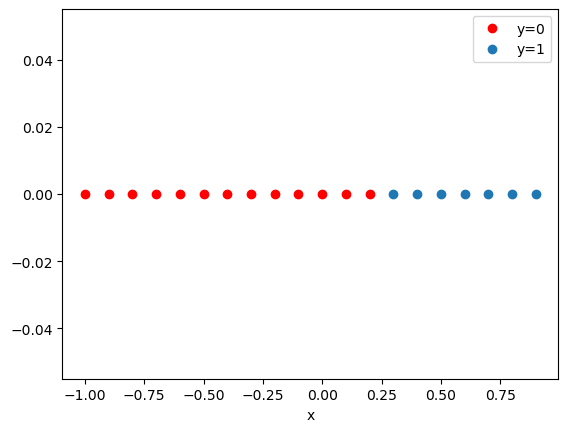

In [7]:
data_set.x
data_set.y
len(data_set)
x,y = data_set[0]
print("x = {},  y = {}".format(x,y))
x,y = data_set[1]
print("x = {},  y = {}".format(x,y))
plt.plot(data_set.x[data_set.y==0], data_set.y[data_set.y==0], 'ro', label="y=0")
plt.plot(data_set.x[data_set.y==1], data_set.y[data_set.y==1]-1, 'o', label="y=1")
plt.xlabel('x')
plt.legend()   

In [8]:
class logistic_regression(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [9]:
x,y = data_set[0]
len(x)

1

In [10]:
model = logistic_regression(1)
criterion= nn.BCELoss()
batch_size = 10
trainloader = DataLoader(dataset=data_set, batch_size=batch_size)

In [11]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<Figure size 640x480 with 0 Axes>

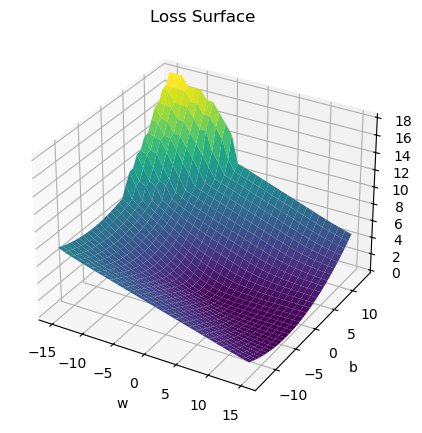

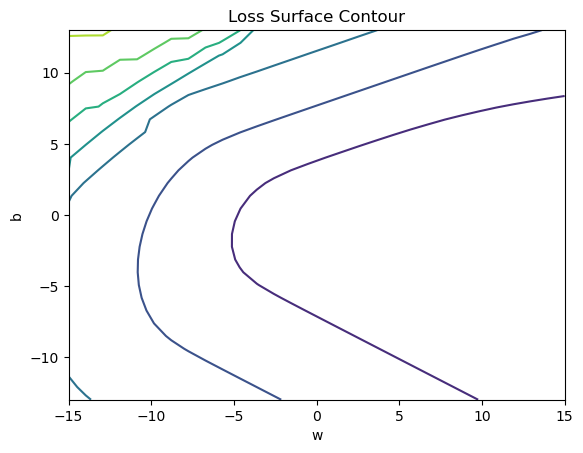

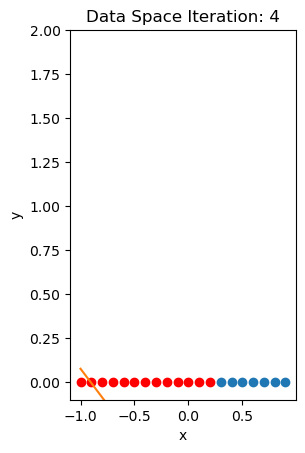

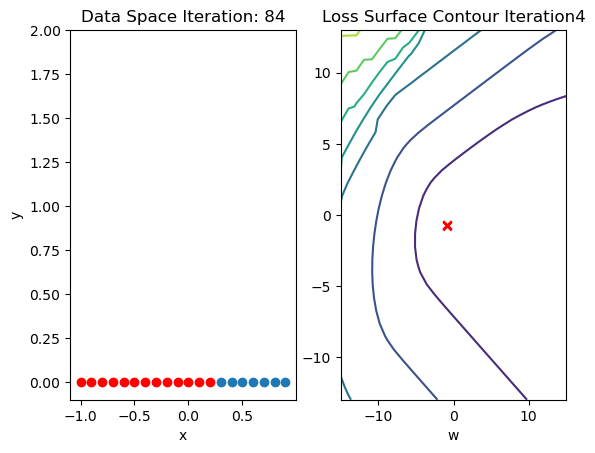

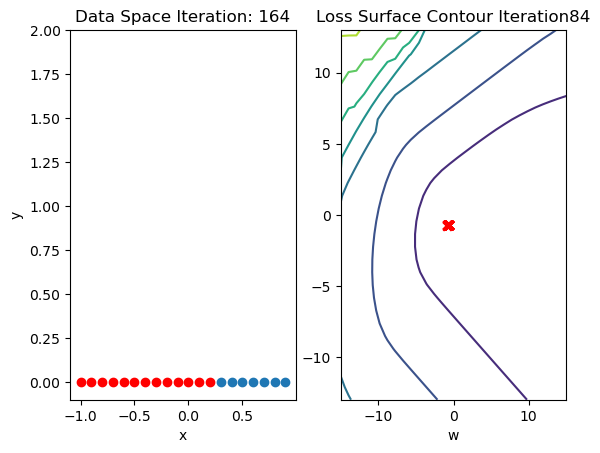

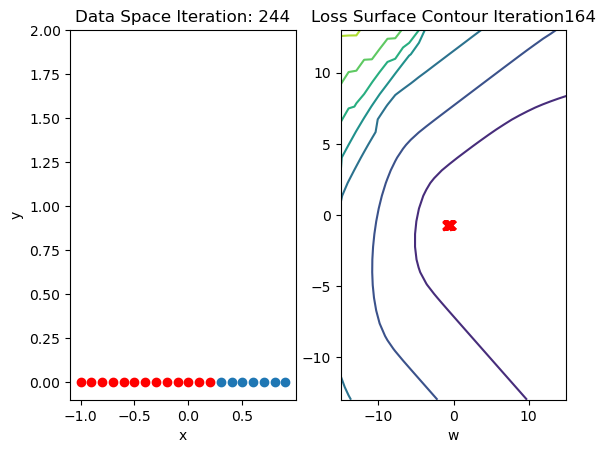

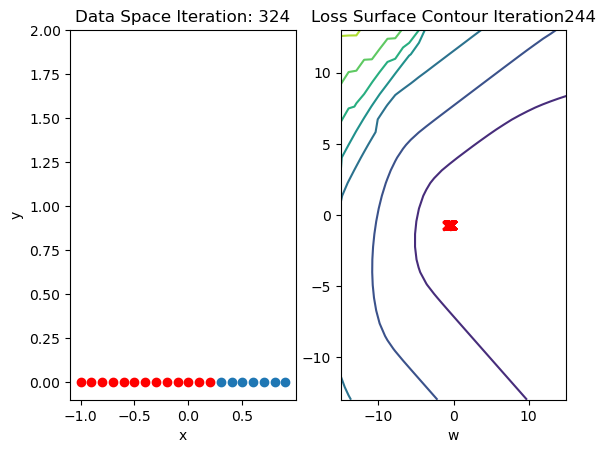

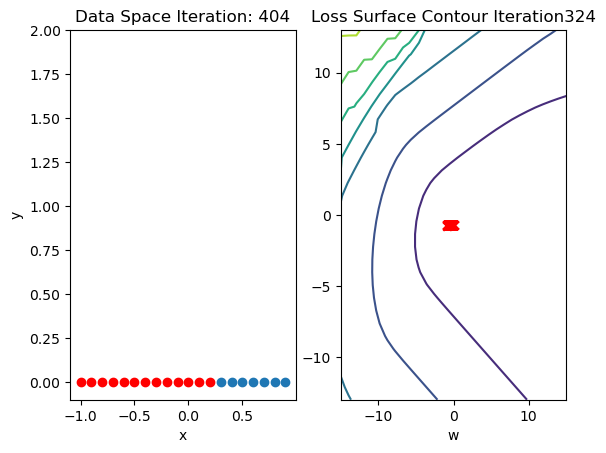

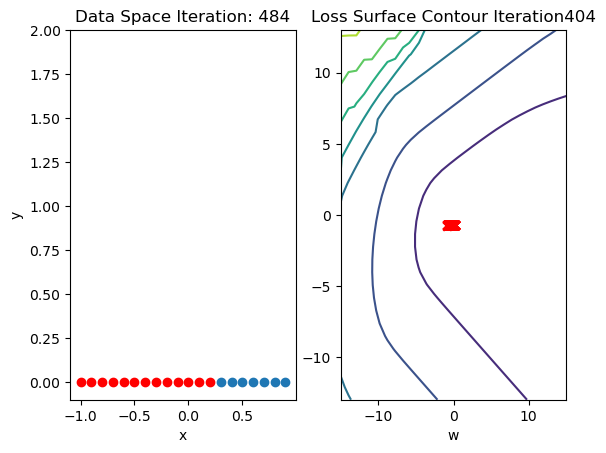

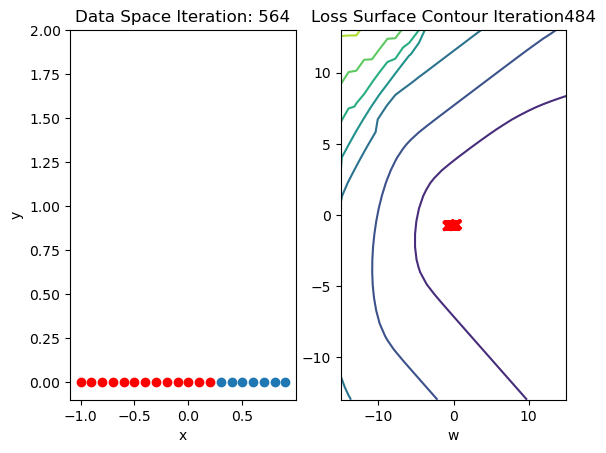

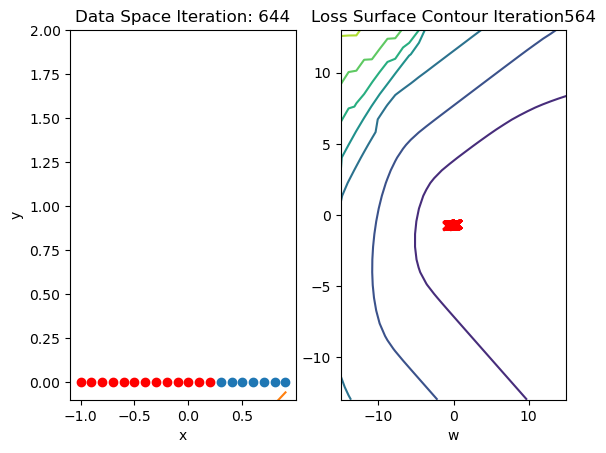

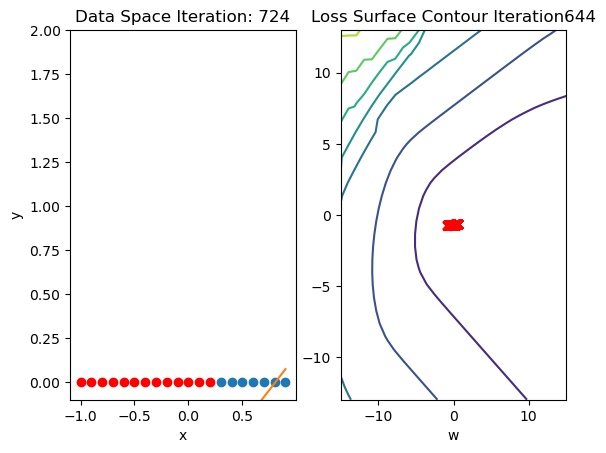

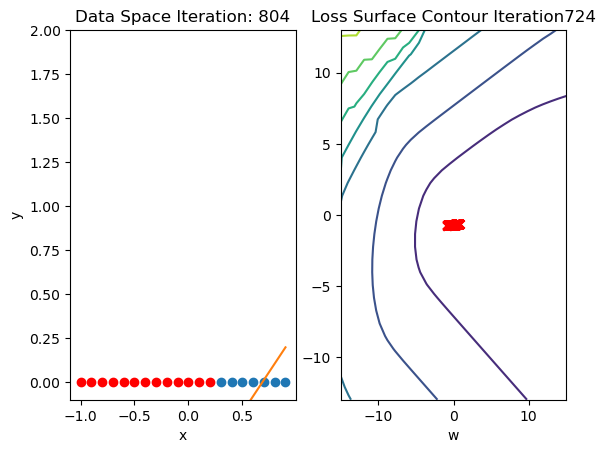

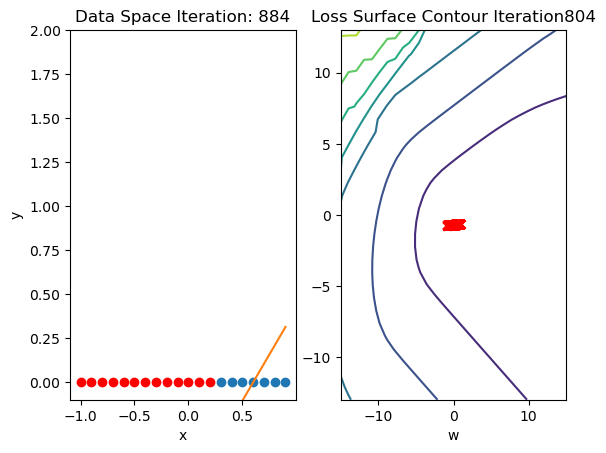

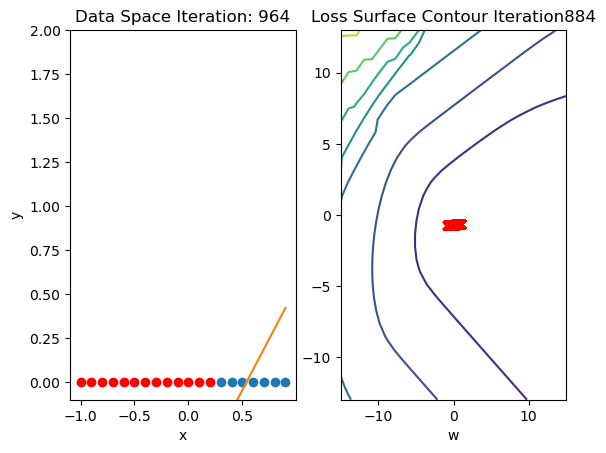

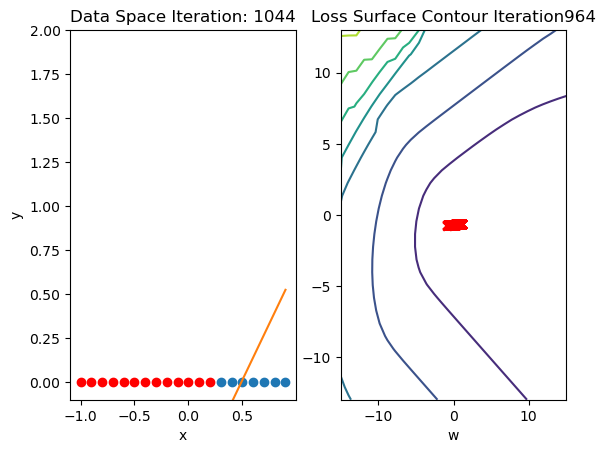

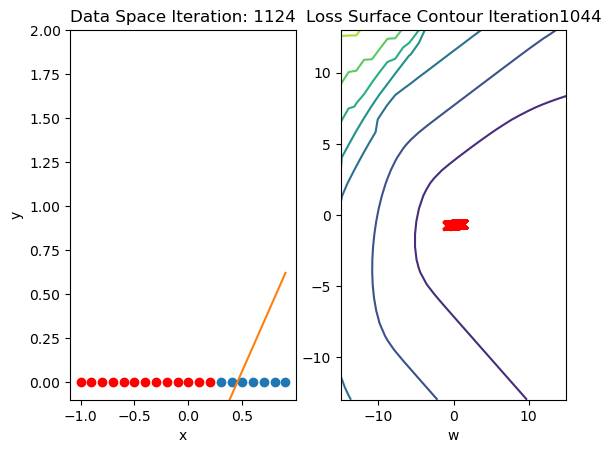

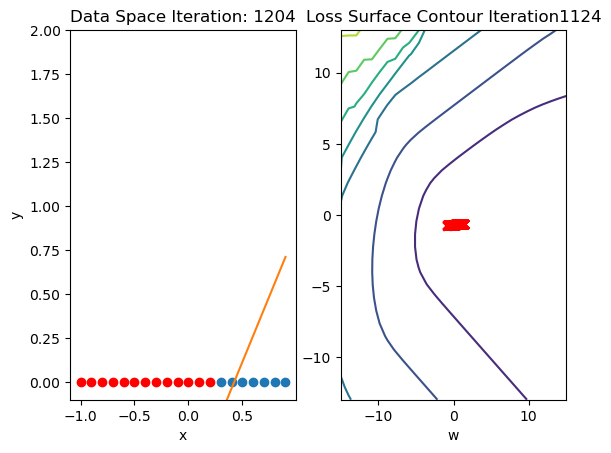

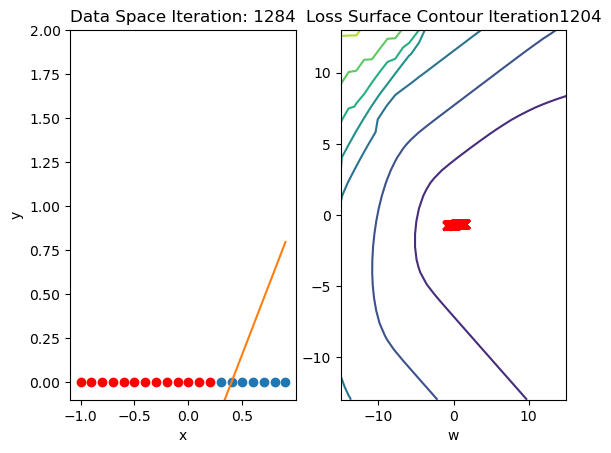

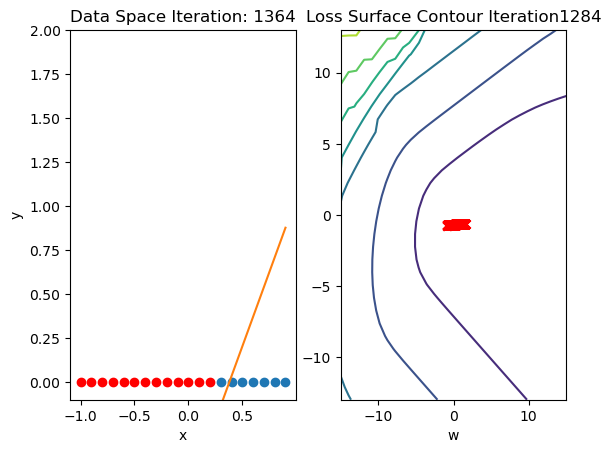

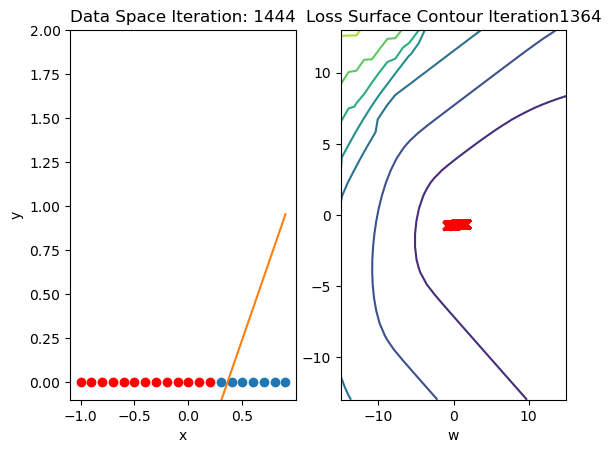

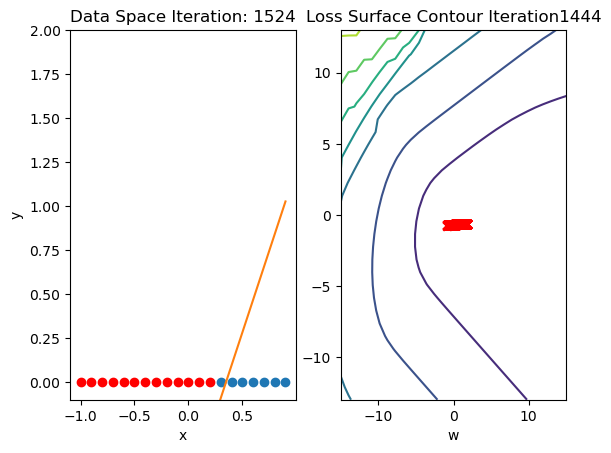

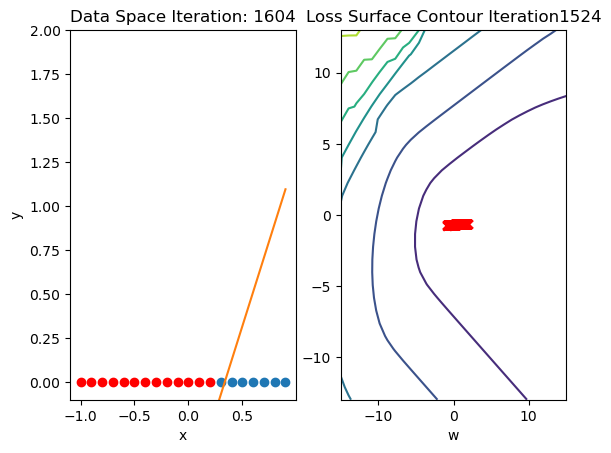

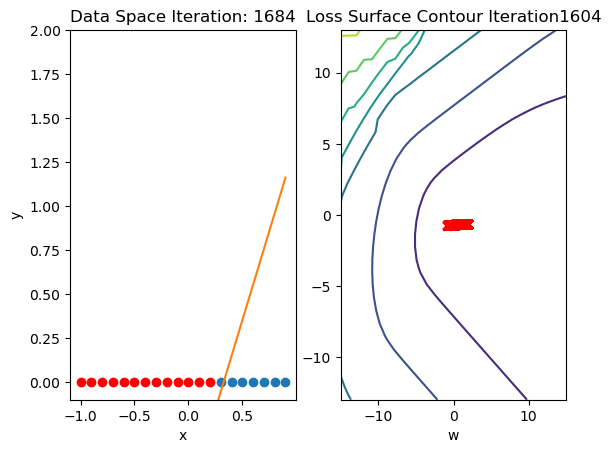

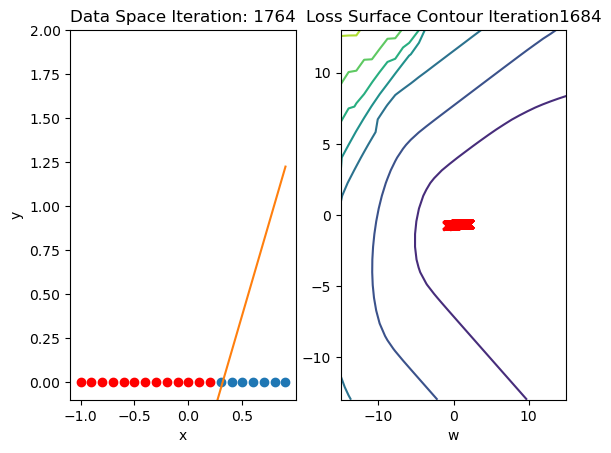

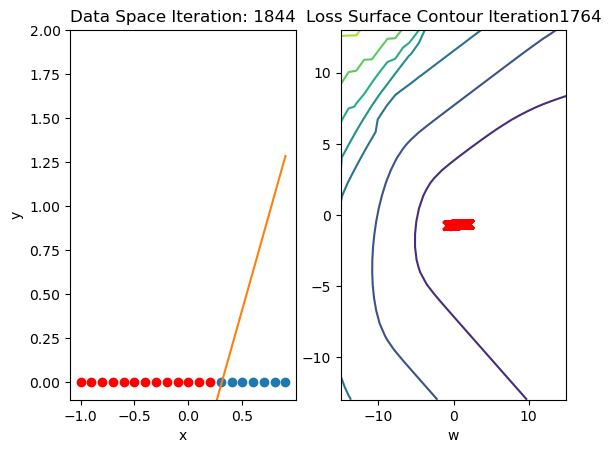

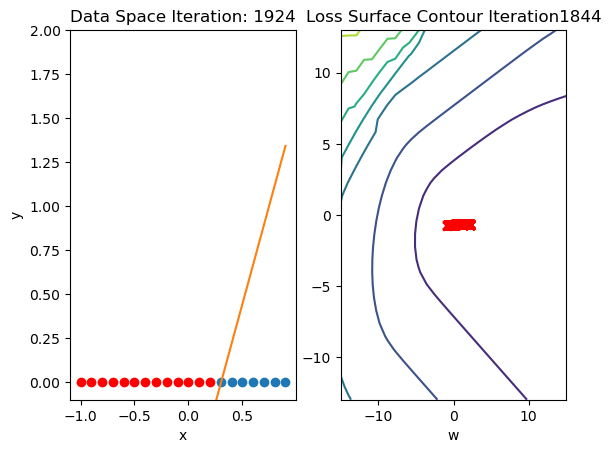

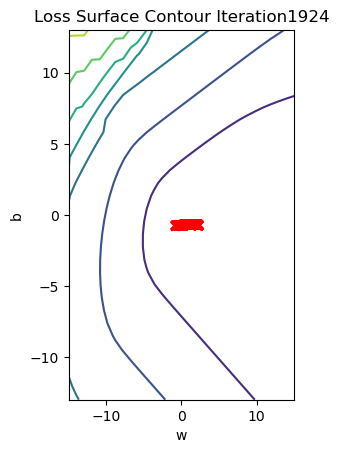

In [12]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 500
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [13]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([2.3160]) b =  tensor(-0.6895)


In [14]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

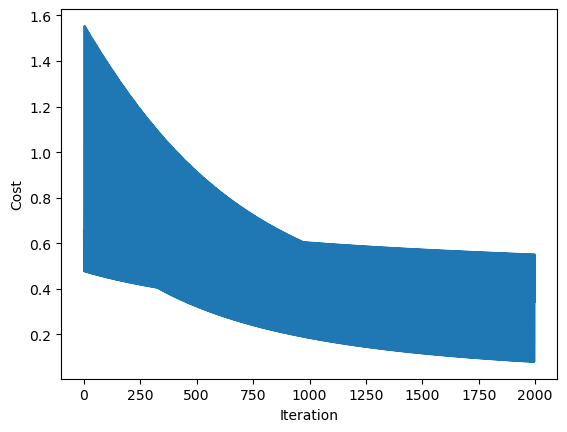

In [15]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")

## Stochastic Gradient Descent¶

<Figure size 640x480 with 0 Axes>

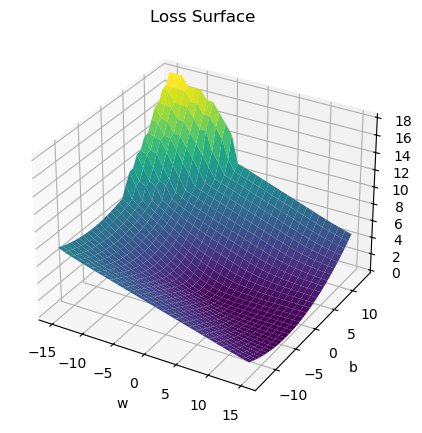

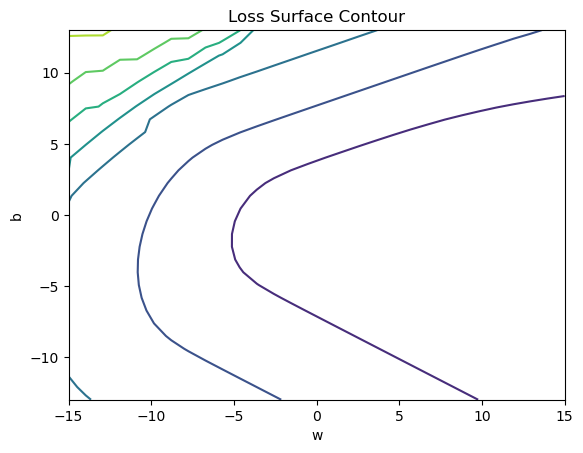

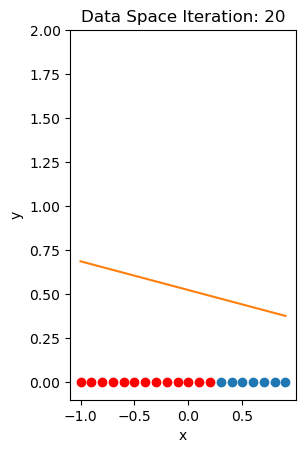

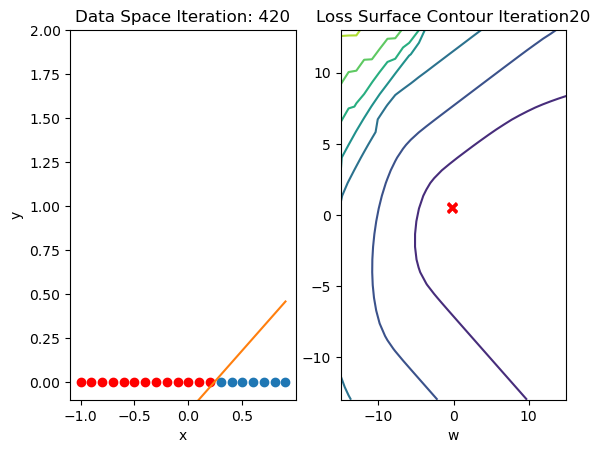

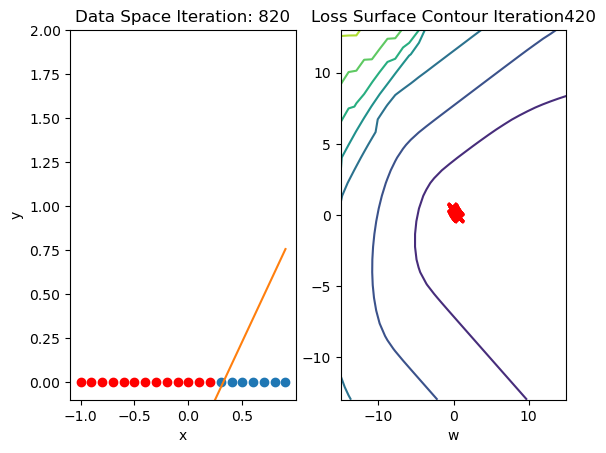

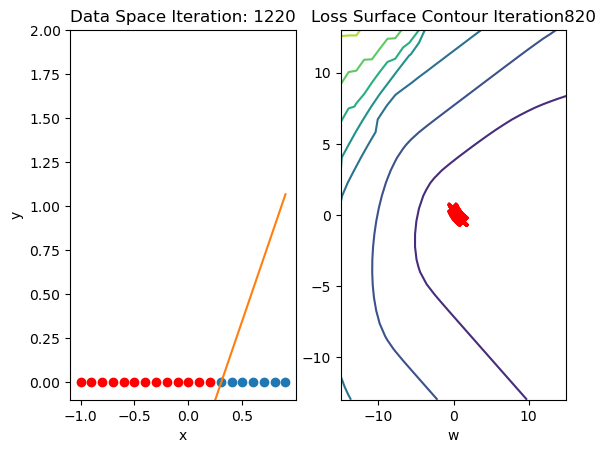

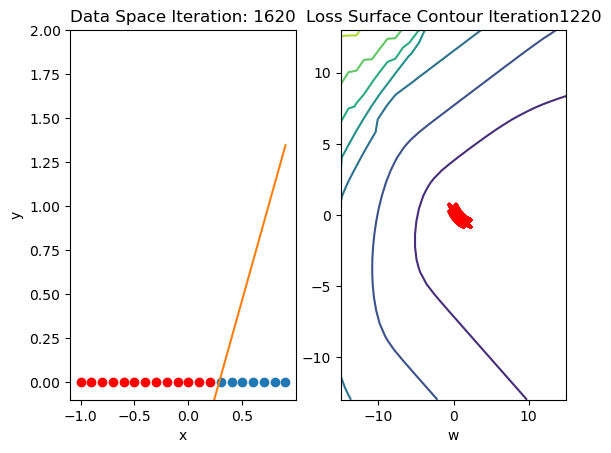

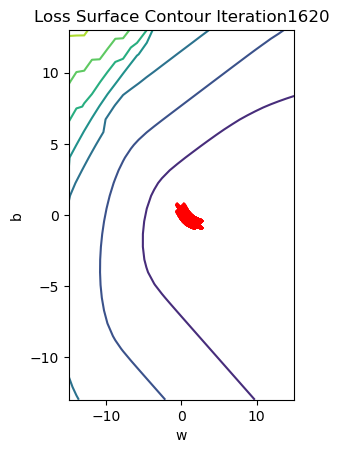

In [16]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 100
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [17]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([2.5085]) b =  tensor(-0.6814)


In [18]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

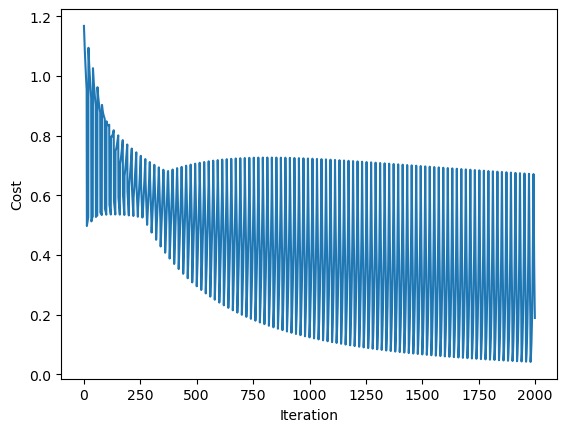

In [19]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")

## With a higher lerning rate 

<Figure size 640x480 with 0 Axes>

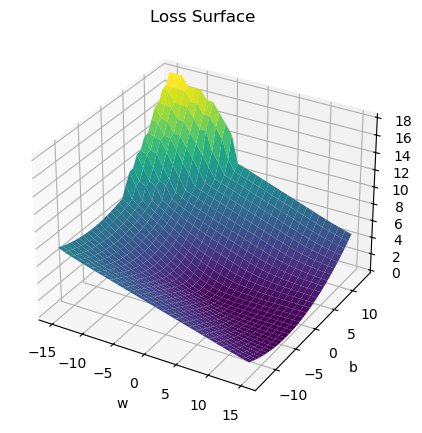

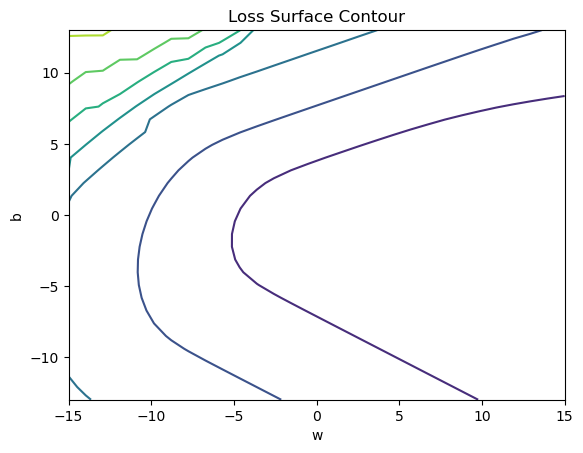

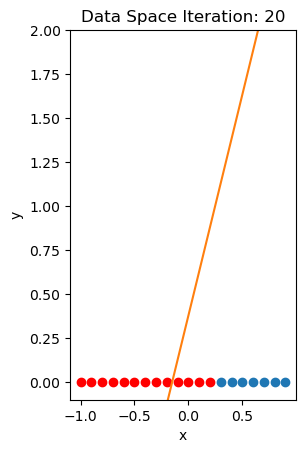

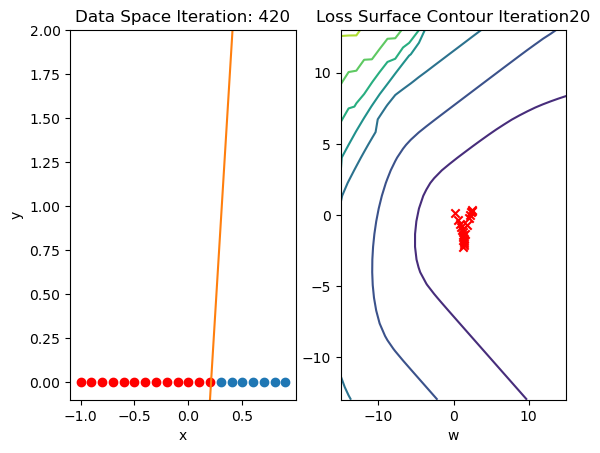

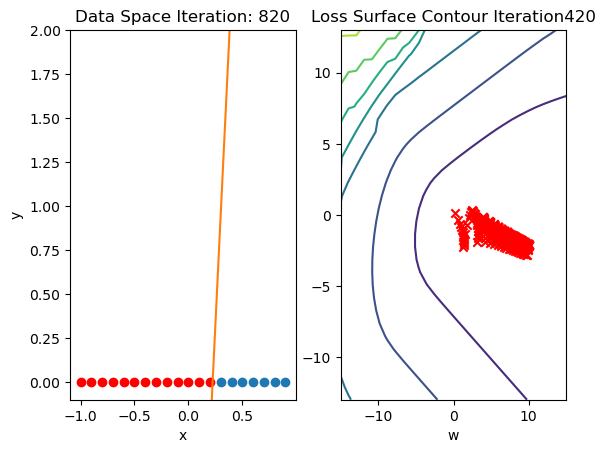

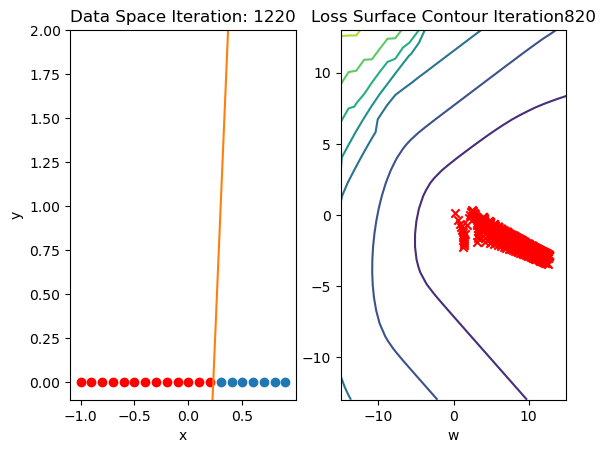

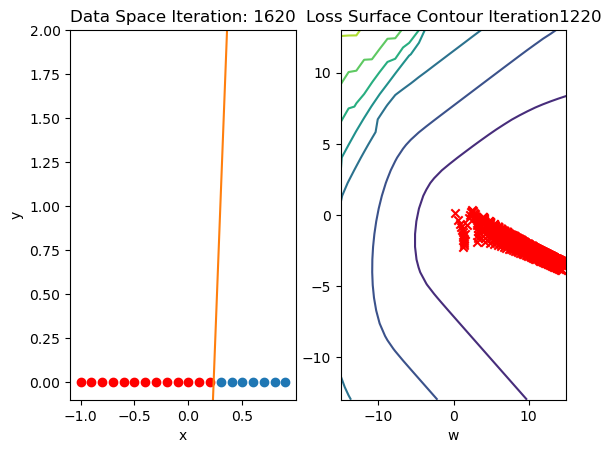

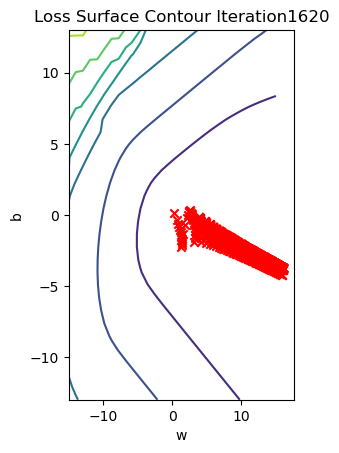

In [20]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=1)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
epochs = 100
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [21]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([17.3061]) b =  tensor(-4.0862)


In [22]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

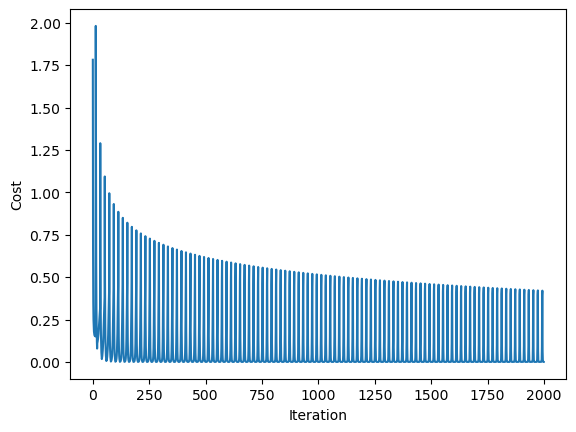

In [23]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")

##  Softmax

In [24]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [25]:
def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.set_xlabel("class: {0}".format(i))
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [26]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Training dataset:\n", train_dataset)

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Validation dataset:\n", validation_dataset)


Training dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Validation dataset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


First Image and Label:


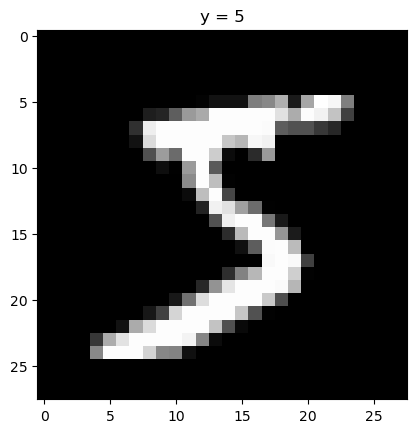

In [27]:
print("First Image and Label:")
show_data(train_dataset[0])

Label of 4th element: 1
Image of 4th element:
Image of 3rd element:


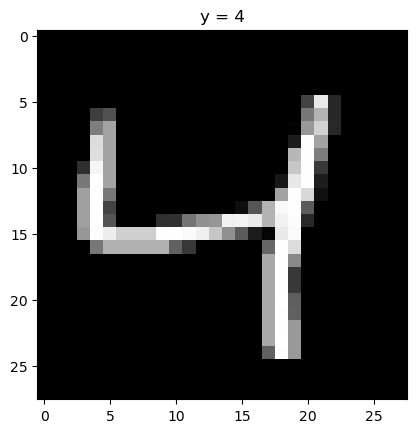

In [28]:
print("Label of 4th element:", train_dataset[3][1])
print("Image of 4th element:")
show_data(train_dataset[3])
print("Image of 3rd element:")
show_data(train_dataset[2])

In [29]:
import torch.nn as nn
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        z = self.linear(x)
        return z

In [30]:
input_dim = 28 * 28  
output_dim = 10     

In [31]:
model = SoftMax(input_dim, output_dim)
print("Model:\n", model)
print("Weight shape:", list(model.parameters())[0].size())
print("Bias shape:", list(model.parameters())[1].size())

Model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
Weight shape: torch.Size([10, 784])
Bias shape: torch.Size([10])


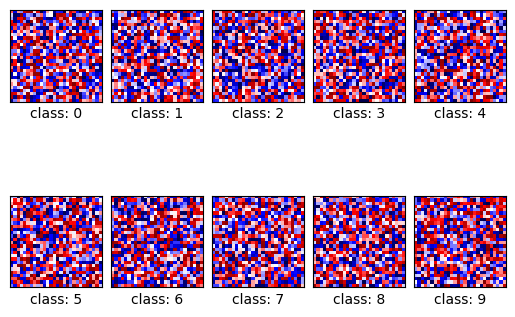

In [32]:
PlotParameters(model)

In [33]:
X = train_dataset[0][0]
print(X.shape)
X = X.view(-1, 28 * 28)
print(X.shape)
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[-0.2423, -0.4931, -0.0079, -0.2768,  0.0252,  0.0246,  0.3409, -0.0616,
          0.1147, -0.0243]], grad_fn=<AddmmBackward0>)

In [34]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [35]:
X = train_dataset[0][0]
X = X.view(-1, 28 * 28)
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])
print("Output: ", model_output)
print("Actual:", actual)
criterion(model_output, actual)

Output:  tensor([[-0.2423, -0.4931, -0.0079, -0.2768,  0.0252,  0.0246,  0.3409, -0.0616,
          0.1147, -0.0243]], grad_fn=<AddmmBackward0>)
Actual: tensor([5])


tensor(2.2414, grad_fn=<NllLossBackward0>)

In [36]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

-1 * torch.log(probability[0][actual])

tensor([[0.0814, 0.0634, 0.1029, 0.0786, 0.1064, 0.1063, 0.1459, 0.0975, 0.1163,
         0.1012]], grad_fn=<SoftmaxBackward0>)


tensor([2.2414], grad_fn=<MulBackward0>)

In [37]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)
def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
train_model(n_epochs)

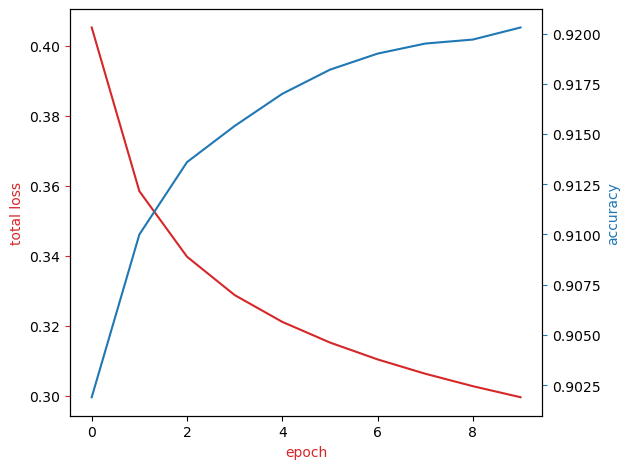

In [38]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

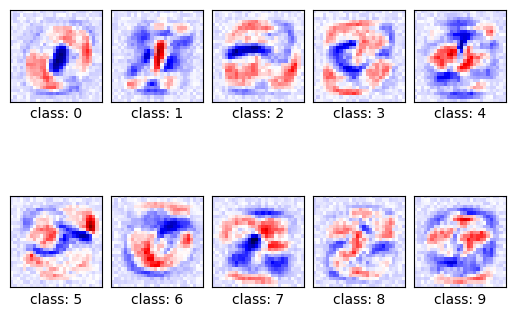

In [39]:
PlotParameters(model)

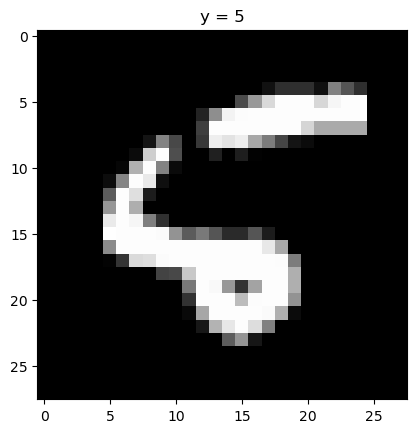

True label: 5
Predicted: tensor([6])
Probability of predicted class: 0.9904032945632935


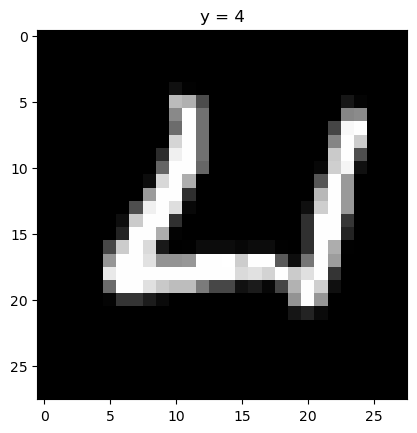

True label: 4
Predicted: tensor([6])
Probability of predicted class: 0.4621366858482361


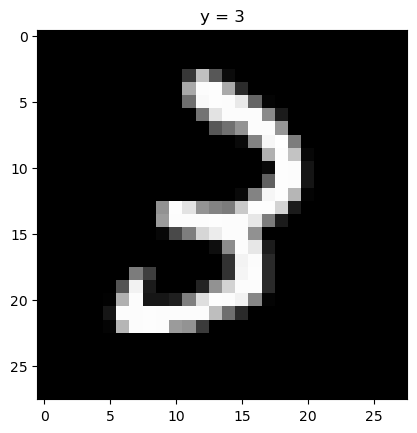

True label: 3
Predicted: tensor([2])
Probability of predicted class: 0.6866523623466492


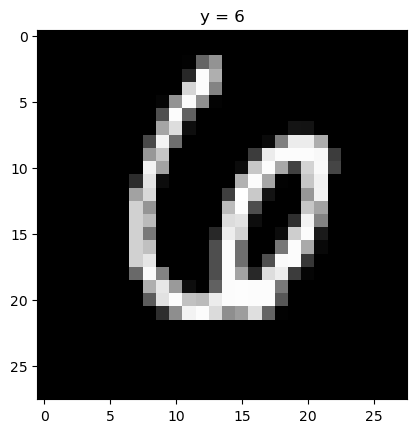

True label: 6
Predicted: tensor([7])
Probability of predicted class: 0.3429006040096283


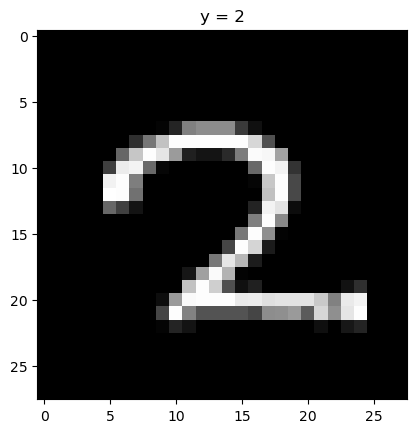

True label: 2
Predicted: tensor([7])
Probability of predicted class: 0.5367340445518494


In [40]:
Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("True label:", y)
        print("Predicted:", yhat)
        print("Probability of predicted class:", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

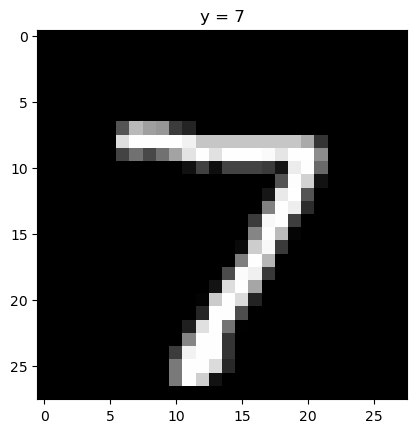

True label: 7
Predicted: tensor([7])
Probability of predicted class: 0.9966927766799927


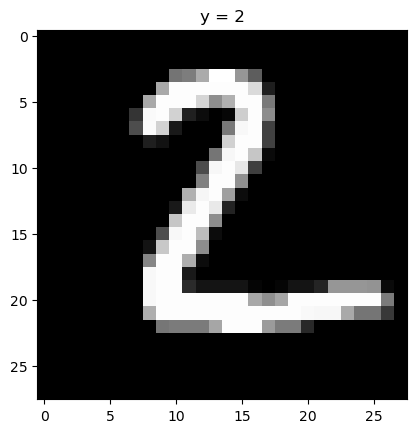

True label: 2
Predicted: tensor([2])
Probability of predicted class: 0.9485883712768555


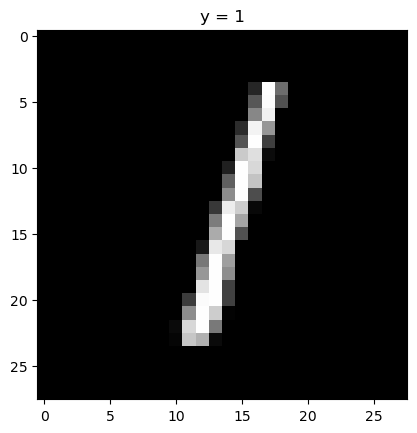

True label: 1
Predicted: tensor([1])
Probability of predicted class: 0.9752742648124695


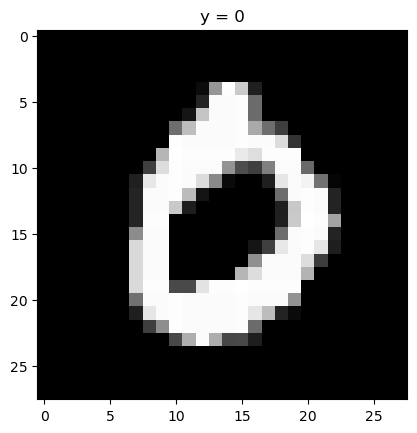

True label: 0
Predicted: tensor([0])
Probability of predicted class: 0.9995631575584412


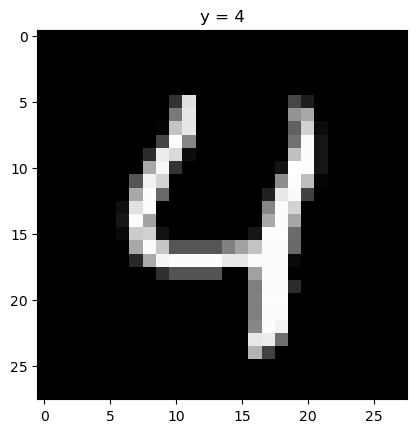

True label: 4
Predicted: tensor([4])
Probability of predicted class: 0.945736825466156


In [41]:
Softmax_fn = nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("True label:", y)
        print("Predicted:", yhat)
        print("Probability of predicted class:", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

# Neural Network for XOR

### Import Required Libraries

In [42]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

### Define Helper Functions

In [43]:
# Function to plot decision regions
def plot_decision_regions_2class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("Decision Region")
    plt.legend()
# Function to calculate accuracy
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

### Creating Noisy XOR dataset

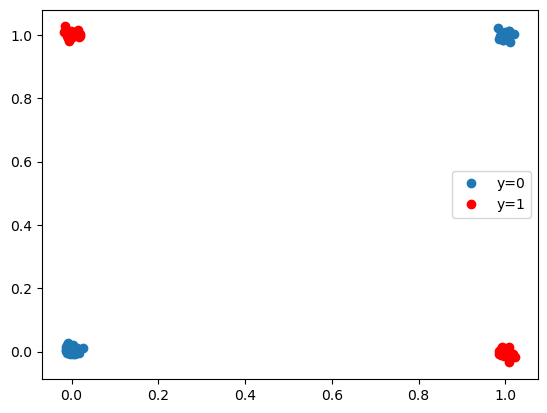

In [44]:
class XOR_Data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])
            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])
        self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()
data_set = XOR_Data()
data_set.plot_stuff()

### Define the simple neural network

In [45]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

### Training function

In [46]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('Epoch', color=color)
    ax1.set_ylabel('Total Loss', color=color)
    ax1.tick_params(axis='y', color=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()
    plt.show()
    return COST

### Using one neuron

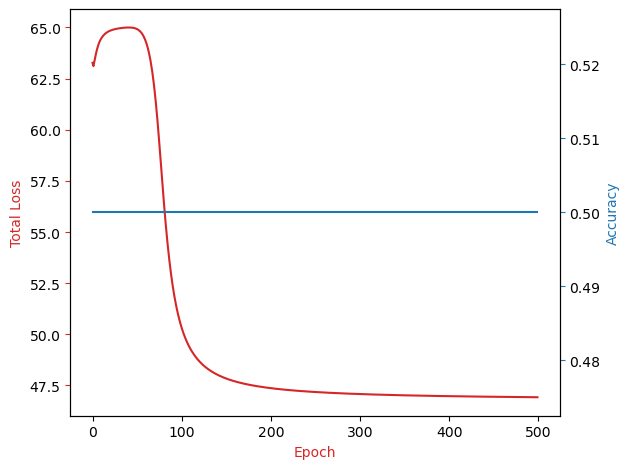

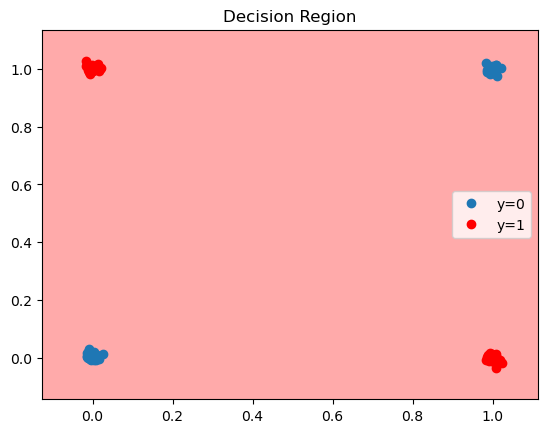

In [47]:
model = Net(D_in=2, H=1, D_out=1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS1 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

### Using 2 neurons

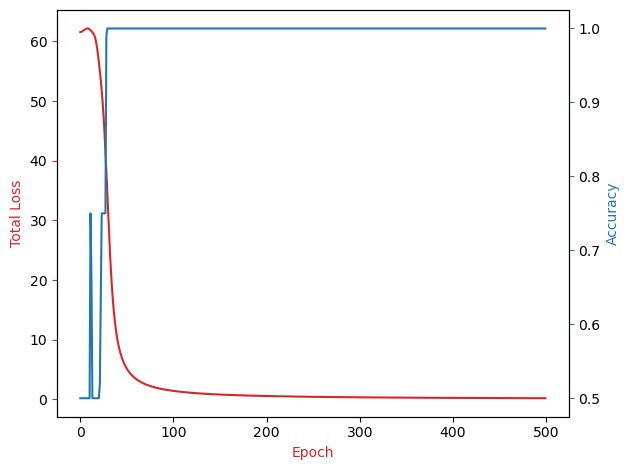

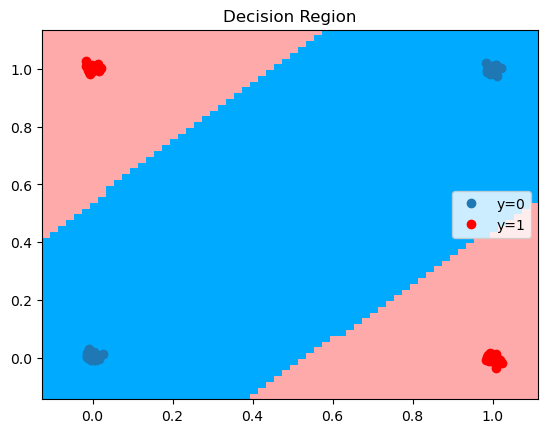

In [48]:
model = Net(D_in=2, H=2, D_out=1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS1 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

### Using 3 neurons

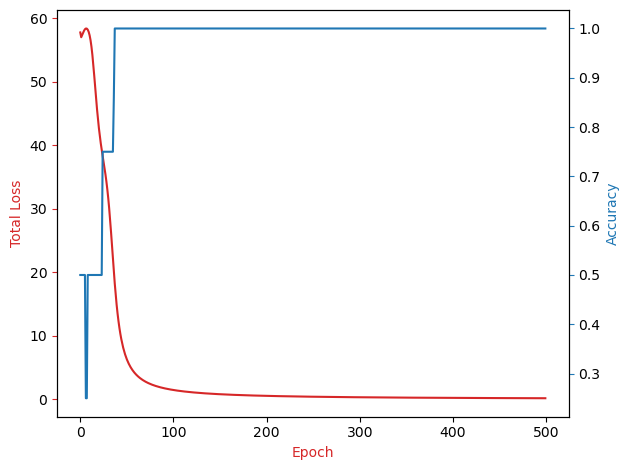

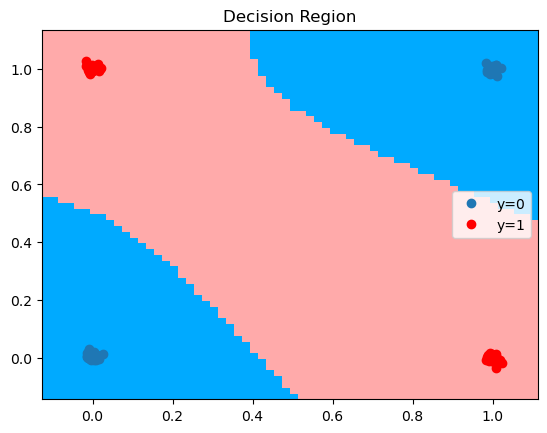

In [49]:
model = Net(D_in=2, H=3, D_out=1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS1 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, data_set)

## Training a Neural Network with Momentum

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [51]:
class XOR_Data:
    def __init__(self, n_samples=1000):
        self.X = np.random.randint(0, 2, (n_samples, 2))
        self.y = np.logical_xor(self.X[:, 0], self.X[:, 1]).astype(int)
        self.X = self.X + 0.2 * np.random.randn(*self.X.shape)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
    def get_train(self):
        return torch.tensor(self.X_train, dtype=torch.float32), torch.tensor(self.y_train, dtype=torch.float32)
    def get_test(self):
        return torch.tensor(self.X_test, dtype=torch.float32), torch.tensor(self.y_test, dtype=torch.float32)

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)  
        self.fc2 = nn.Linear(2, 1)  
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [53]:
def train_model(momentum=0.0):
    model = Net()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=momentum)
    X_train, y_train = data.get_train()
    X_test, y_test = data.get_test()
    loss_history = []
    acc_history = []
    for epoch in range(500):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = model(X_test).squeeze().round()
            acc = accuracy_score(y_test.numpy(), y_pred.numpy())
        loss_history.append(loss.item())
        acc_history.append(acc)
    print(f"Final Accuracy with momentum={momentum}: {acc_history[-1]*100:.2f}%")
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Loss Curve (Momentum={momentum})")
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.title(f"Accuracy Curve (Momentum={momentum})")
    plt.plot(acc_history)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()
    return model

Training with Momentum = 0.0
Final Accuracy with momentum=0.0: 62.50%


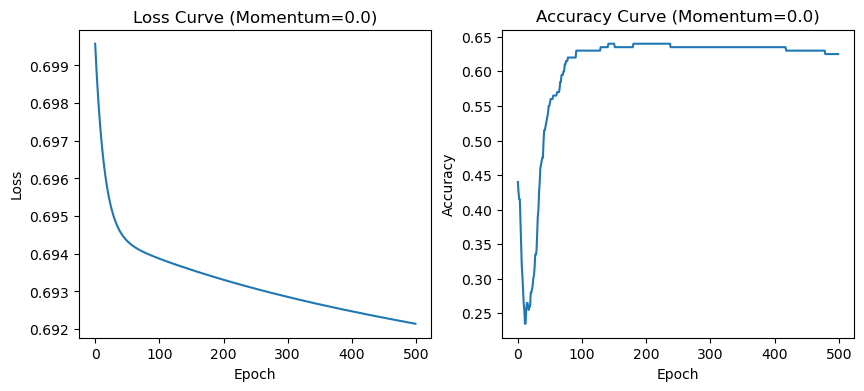

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [54]:
print("Training with Momentum = 0.0")
data = XOR_Data()  
train_model(momentum=0.0)

Training with Momentum = 0.5
Final Accuracy with momentum=0.5: 44.50%


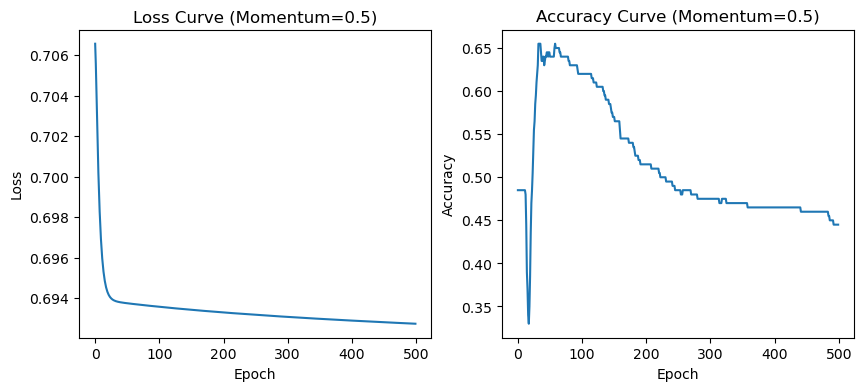

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [55]:
print("Training with Momentum = 0.5")
data = XOR_Data()  
train_model(momentum=0.5)

Training with Momentum = 0.9
Final Accuracy with momentum=0.9: 74.50%


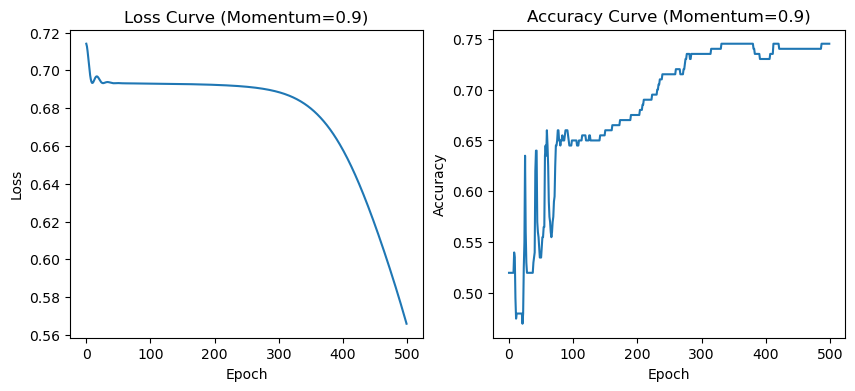

Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [56]:
print("Training with Momentum = 0.9")
data = XOR_Data()
train_model(momentum=0.9)

## Sigmoid vs ReLU activation

In [57]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

### Net using Sigmoid activation and NetRele using RELU activation

In [58]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [59]:
class NetRelu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [60]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff


In [61]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [62]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [63]:
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10
cust_epochs = 10
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

### Train Sigmoid Network

In [64]:
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

### Train ReLU Network

In [65]:
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=0.01)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

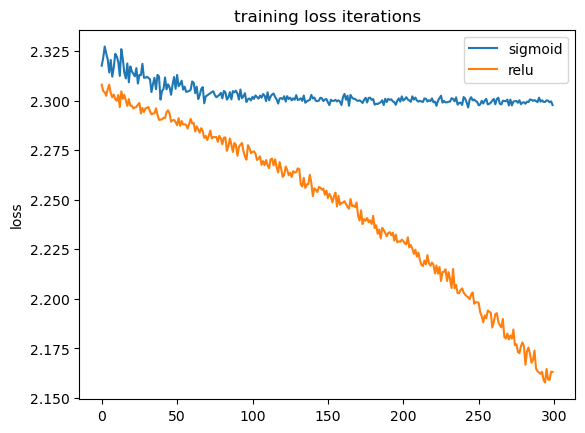

In [66]:
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

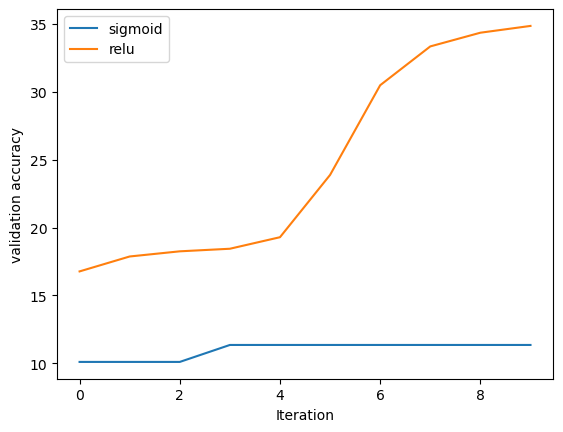

In [67]:
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

## Object Detection

### Using Haar Cascade

In [68]:
import urllib.request
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)  

4.12.0


In [69]:
def plt_show(image, title="", gray=False, size=(12, 10)):
    from pylab import rcParams
    temp = image
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)   
    rcParams['figure.figsize'] = [10, 10]
    plt.axis("off")
    plt.title(title)
    plt.imshow(temp, cmap='gray')
    plt.show()

In [70]:
def detect_obj(image):
    plt_show(image)
    object_list = detector.detectMultiScale(image)
    print(object_list)    
    for obj in object_list:
        (x, y, w, h) = obj
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)    
    plt_show(image)

In [71]:
haarcascade_url = 'https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml'
haar_name = "cars.xml"
urllib.request.urlretrieve(haarcascade_url, haar_name)
detector = cv2.CascadeClassifier(haar_name)

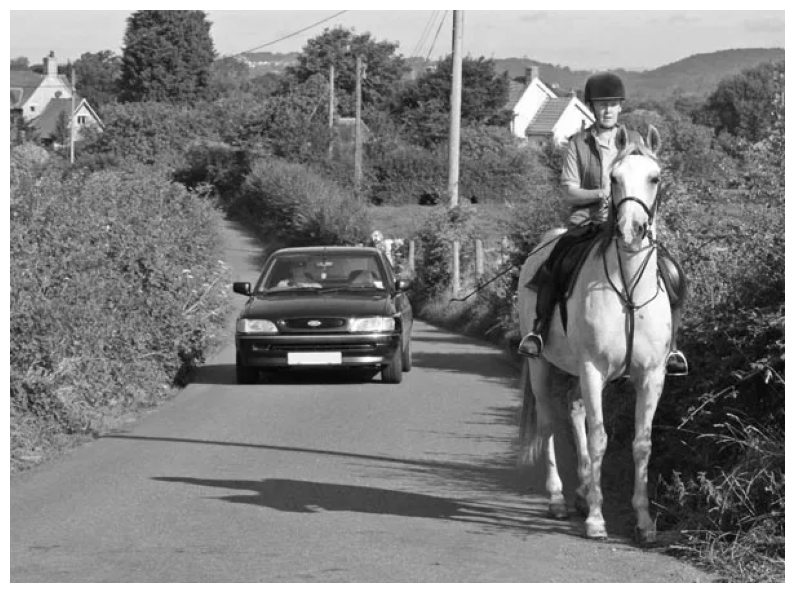

In [72]:
image_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/CV0101/Dataset/car-road-behind.jpg"
image_name = "car-road-behind.jpg"
urllib.request.urlretrieve(image_url, image_name)
image = cv2.imread(image_name)
plt_show(image)